In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pathlib import Path

In [2]:
gpp_trendy_S3_path = "/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/pipeline/3.benchmark/ilamb/benchmarks/32_year_vs_ensmean_scenarios/S3/DATA/gpp/ENSMEAN/ENSMEAN_S3_gpp.nc"
ra_trendy_S3_path = "/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/pipeline/3.benchmark/ilamb/benchmarks/32_year_vs_ensmean_scenarios/S3/DATA/ra/ENSMEAN/ENSMEAN_S3_ra.nc"
rh_trendy_S3_path = "/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/pipeline/3.benchmark/ilamb/benchmarks/32_year_vs_ensmean_scenarios/S3/DATA/rh/ENSMEAN/ENSMEAN_S3_rh.nc"
nee_trendy_S3_path = "/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/pipeline/3.benchmark/ilamb/benchmarks/32_year_vs_ensmean_scenarios/S3/DATA/nee/ENSMEAN/ENSMEAN_S3_nee.nc"

gpp_emu_S3_path = "/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/pipeline/3.benchmark/ilamb/benchmarks/32_year_vs_ensmean_scenarios/S3/MODELS/32_year/gpp.nc"
ra_emu_S3_path = "/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/pipeline/3.benchmark/ilamb/benchmarks/32_year_vs_ensmean_scenarios/S3/MODELS/32_year/ra.nc"
rh_emu_S3_path = "/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/pipeline/3.benchmark/ilamb/benchmarks/32_year_vs_ensmean_scenarios/S3/MODELS/32_year/rh.nc"

gpp_trendy = xr.open_dataset(gpp_trendy_S3_path)['gpp']
ra_trendy = xr.open_dataset(ra_trendy_S3_path)['ra']
rh_trendy = xr.open_dataset(rh_trendy_S3_path)['rh']
nee_trendy_on_file = xr.open_dataset(nee_trendy_S3_path)['nee']

gpp_emu = xr.open_dataset(gpp_emu_S3_path)['gpp']
ra_emu = xr.open_dataset(ra_emu_S3_path)['ra']
rh_emu = xr.open_dataset(rh_emu_S3_path)['rh']

gpp_trendy_f = gpp_trendy.where(np.isfinite(gpp_trendy)).astype("float32")
rh_trendy_f  = rh_trendy.where(np.isfinite(rh_trendy)).astype("float32")
ra_trendy_f  = ra_trendy.where(np.isfinite(ra_trendy)).astype("float32")

gpp_emu_f = gpp_emu.where(np.isfinite(gpp_emu)).astype("float32")
rh_emu_f  = rh_emu.where(np.isfinite(rh_emu)).astype("float32")
ra_emu_f  = ra_emu.where(np.isfinite(ra_emu)).astype("float32")

In [5]:
nee_trendy_calc = gpp_trendy_f - rh_trendy_f - ra_trendy_f
nee_emu_calc = gpp_emu_f - rh_emu_f - ra_emu_f

In [7]:
print("on-file NEE:", nee_trendy_on_file.mean(dim="time").min().item(),
      nee_trendy_on_file.mean(dim="time").max().item())
print("calc NEE:", nee_trendy_calc.mean(dim="time").min().item(),
      nee_trendy_calc.mean(dim="time").max().item())
print("emu NEE:", nee_emu_calc.mean(dim="time").min().item(),
      nee_emu_calc.mean(dim="time").max().item())

print("all NaN on-file?", np.isnan(nee_trendy_on_file.mean(dim="time")).all().item())
print("all NaN calc?", np.isnan(nee_trendy_calc.mean(dim="time")).all().item())
print("all NaN emu?", np.isnan(nee_emu_calc.mean(dim="time")).all().item())

on-file NEE: -3.031752873829848e-10 6.433426946704344e-09
calc NEE: -3.031754014504173e-10 6.4334231275609e-09
emu NEE: -3.2394991134054862e-09 8.63471338874433e-09
all NaN on-file? False
all NaN calc? False
all NaN emu? False


In [9]:
nee_trendy_on_file_2d = nee_trendy_on_file.mean(dim="time", skipna=True)
nee_trendy_calc_2d    = nee_trendy_calc.mean(dim="time",    skipna=True)
nee_emu_calc_2d       = nee_emu_calc.mean(dim="time",       skipna=True)

/tmp/ipykernel_1730819/3413254278.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


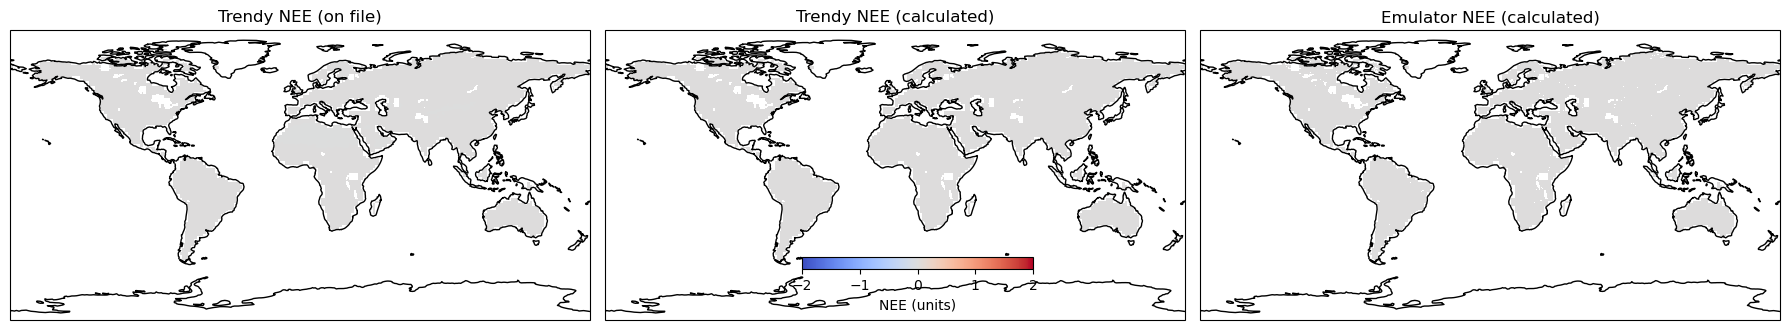

In [ ]:
fig, axs = plt.subplots(
    1, 3, figsize=(18, 6),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

vmin = float(nee_trendy_on_file_2d.quantile(0.02))
vmax = float(nee_trendy_on_file_2d.quantile(0.98))

im1 = axs[0].pcolormesh(
    nee_trendy_on_file.lon, nee_trendy_on_file.lat,
    nee_trendy_on_file_2d,  # 2D (lat, lon)
    vmin=vmin, vmax=vmax, cmap='coolwarm',
    transform=ccrs.PlateCarree(), shading="auto"
)
axs[0].add_feature(cfeature.COASTLINE)
axs[0].set_title('Trendy NEE (on file)')

im2 = axs[1].pcolormesh(
    nee_trendy_calc.lon, nee_trendy_calc.lat,
    nee_trendy_calc_2d,
    vmin=vmin, vmax=vmax, cmap='coolwarm',
    transform=ccrs.PlateCarree(), shading="auto"
)
axs[1].add_feature(cfeature.COASTLINE)
axs[1].set_title('Trendy NEE (calculated)')

im3 = axs[2].pcolormesh(
    nee_emu_calc.lon, nee_emu_calc.lat,
    nee_emu_calc_2d,
    vmin=vmin, vmax=vmax, cmap='coolwarm',
    transform=ccrs.PlateCarree(), shading="auto"
)
axs[2].add_feature(cfeature.COASTLINE)
axs[2].set_title('Emulator NEE (calculated)')

fig.colorbar(im1, ax=axs, orientation='horizontal',
             fraction=0.025, pad=0.05, label='NEE (units)')
plt.tight_layout()
plt.show()